In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cross_decomposition import CCA
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
link = r'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'
df = pd.read_csv(link,parse_dates=['DateTime'])
df.set_index('DateTime', inplace=True)
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
DateTime,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df=df.resample('H').mean()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Freq: H
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                8736 non-null   float64
 1   Humidity                   8736 non-null   float64
 2   Wind Speed                 8736 non-null   float64
 3   general diffuse flows      8736 non-null   float64
 4   diffuse flows              8736 non-null   float64
 5   Zone 1 Power Consumption   8736 non-null   float64
 6   Zone 2  Power Consumption  8736 non-null   float64
 7   Zone 3  Power Consumption  8736 non-null   float64
dtypes: float64(8)
memory usage: 614.2 KB


In [5]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [6]:
cols={
    df.columns[0]:'Temp',
    df.columns[1]:'Humid',
    df.columns[2]:'wSpd',
    df.columns[3]:'GDF',
    df.columns[4]:'DF',
    df.columns[5]:'Z1',
    df.columns[6]:'Z2',
    df.columns[7]:'Z3',
}
df.rename(columns=cols,inplace=True)
df.head()

,Temp,Humid,wSpd,GDF,DF,Z1,Z2,Z3
DateTime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


In [7]:
df.head()

,Temp,Humid,wSpd,GDF,DF,Z1,Z2,Z3
DateTime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


In [8]:
df.tail()

,Temp,Humid,wSpd,GDF,DF,Z1,Z2,Z3
DateTime,,,,,,,,
2017-12-30 19:00:00,9.453333,62.406667,0.074667,0.052000,0.102000,37513.814957,32497.698680,16926.770708
2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,37008.871988,32020.251610,16998.799520
2017-12-30 21:00:00,8.011667,69.675000,0.081500,0.073167,0.098333,35358.174905,30757.901197,16608.883553
2017-12-30 22:00:00,7.598333,70.315000,0.081833,0.058667,0.108167,33993.409380,28477.447070,15614.885955
2017-12-30 23:00:00,6.877500,72.900000,0.081500,0.060333,0.092667,30107.984788,25713.409022,14143.577428


In [9]:
ind = np.arange(1,df.shape[0],100)

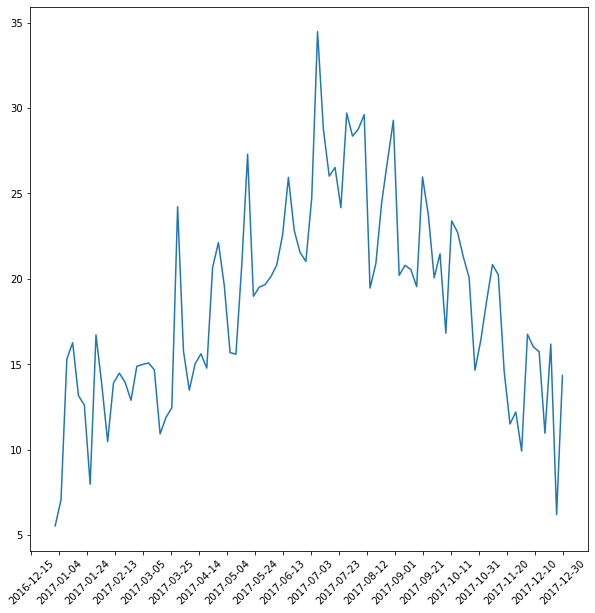

Wall time: 438 ms


In [10]:
%%time
plt.figure(figsize=[10,10])
plt.plot(df['Temp'][ind])
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.show()

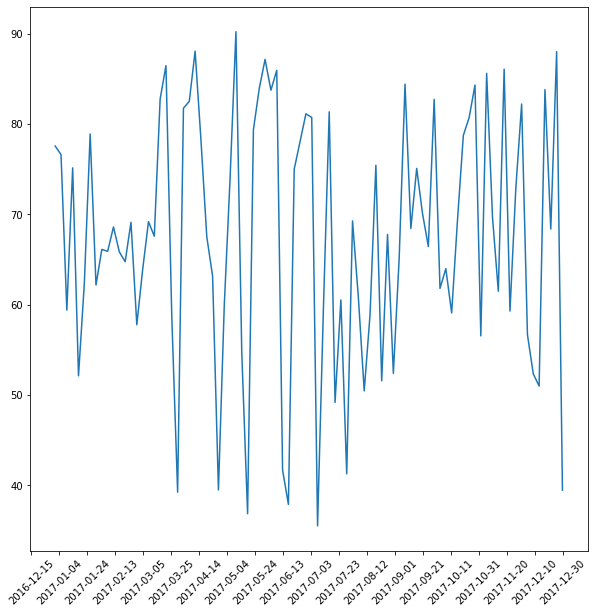

In [11]:
plt.figure(figsize=[10,10])
plt.plot(df['Humid'][ind])
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
plt.show()

In [12]:
xCol = ['Temp','Humid','wSpd','GDF','DF']
yCol = ['Z1','Z2','Z3']
Xdf = df[xCol]
Ydf = df[yCol]

In [13]:
Xdf.head()

,Temp,Humid,wSpd,GDF,DF
DateTime,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833


In [14]:
Ydf.head()

,Z1,Z2,Z3
DateTime,,,
2017-01-01 00:00:00,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,20475.949367,12921.580547,14317.108433


In [15]:
X_norm=(Xdf-Xdf.mean())/Xdf.std()
Y_norm=(Ydf-Ydf.mean())/Ydf.std()

In [16]:
n_components=3

In [17]:
model = CCA(n_components=n_components)
model.fit(X_norm,Y_norm)
X_c,Y_c=model.transform(X_norm,Y_norm)

In [18]:
def plotHeat(corr,size=8):
    plt.figure(figsize=[size,size])
    mask = np.triu(np.ones_like(corr,dtype=bool))
    sns.heatmap(corr.round(3),cmap="coolwarm",annot=True,fmt='.1g',mask=mask,square=True)
    plt.show()

In [19]:
CCAxCol=['CCAX'+str(ii+1) for ii in range(n_components)]
CCAyCol=['CCAY'+str(ii+1) for ii in range(n_components)]

In [20]:
CCAxdf=pd.DataFrame(X_c,columns=CCAxCol)
CCAydf=pd.DataFrame(Y_c,columns=CCAyCol)
CCAxdf.index=Xdf.index
CCAydf.index=Xdf.index

In [21]:
CCAxdf.head()

,CCAX1,CCAX2,CCAX3
DateTime,,,
2017-01-01 00:00:00,-1.812106,-2.278623e-14,-7.393965e-15
2017-01-01 01:00:00,-1.948356,-2.326628e-14,-8.289270e-15
2017-01-01 02:00:00,-2.044472,-2.359273e-14,-8.802756e-15
2017-01-01 03:00:00,-2.026766,-2.349176e-14,-8.264147e-15
2017-01-01 04:00:00,-1.970271,-2.323589e-14,-7.341968e-15


In [22]:
CCAydf.head()

,CCAY1,CCAY2,CCAY3
DateTime,,,
2017-01-01 00:00:00,0.077248,-8.463339e-14,2.253903e-15
2017-01-01 01:00:00,-0.237970,-8.811811e-14,-2.243242e-14
2017-01-01 02:00:00,-0.476464,-8.241913e-14,-3.947444e-14
2017-01-01 03:00:00,-0.627461,-7.435231e-14,-4.968118e-14
2017-01-01 04:00:00,-0.717313,-6.092919e-14,-5.539463e-14


In [23]:
CCAxydf=pd.concat([CCAxdf, CCAydf], axis=1, join='inner')
CCAxydf.head()

,CCAX1,CCAX2,CCAX3,CCAY1,CCAY2,CCAY3
DateTime,,,,,,
2017-01-01 00:00:00,-1.812106,-2.278623e-14,-7.393965e-15,0.077248,-8.463339e-14,2.253903e-15
2017-01-01 01:00:00,-1.948356,-2.326628e-14,-8.289270e-15,-0.237970,-8.811811e-14,-2.243242e-14
2017-01-01 02:00:00,-2.044472,-2.359273e-14,-8.802756e-15,-0.476464,-8.241913e-14,-3.947444e-14
2017-01-01 03:00:00,-2.026766,-2.349176e-14,-8.264147e-15,-0.627461,-7.435231e-14,-4.968118e-14
2017-01-01 04:00:00,-1.970271,-2.323589e-14,-7.341968e-15,-0.717313,-6.092919e-14,-5.539463e-14


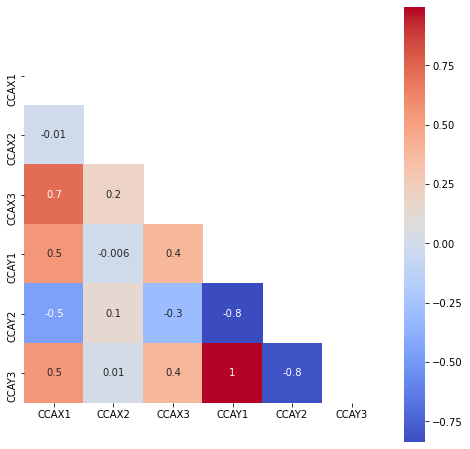

In [24]:
plotHeat(CCAxydf.corr())

In [25]:
XdfxCCA = pd.concat([Xdf,CCAxdf],axis=1, join='inner')
YdfyCCA = pd.concat([Ydf,CCAydf],axis=1, join='inner')

In [26]:
XdfxCCA.head()

,Temp,Humid,wSpd,GDF,DF,CCAX1,CCAX2,CCAX3
DateTime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,-1.812106,-2.278623e-14,-7.393965e-15
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,-1.948356,-2.326628e-14,-8.289270e-15
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,-2.044472,-2.359273e-14,-8.802756e-15
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,-2.026766,-2.349176e-14,-8.264147e-15
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,-1.970271,-2.323589e-14,-7.341968e-15


In [27]:
YdfyCCA.head()

,Z1,Z2,Z3,CCAY1,CCAY2,CCAY3
DateTime,,,,,,
2017-01-01 00:00:00,29197.974683,18026.747720,19252.048193,0.077248,-8.463339e-14,2.253903e-15
2017-01-01 01:00:00,24657.215190,16078.419453,17042.891567,-0.237970,-8.811811e-14,-2.243242e-14
2017-01-01 02:00:00,22083.037973,14330.699088,15676.144578,-0.476464,-8.241913e-14,-3.947444e-14
2017-01-01 03:00:00,20811.139240,13219.452887,14883.855422,-0.627461,-7.435231e-14,-4.968118e-14
2017-01-01 04:00:00,20475.949367,12921.580547,14317.108433,-0.717313,-6.092919e-14,-5.539463e-14


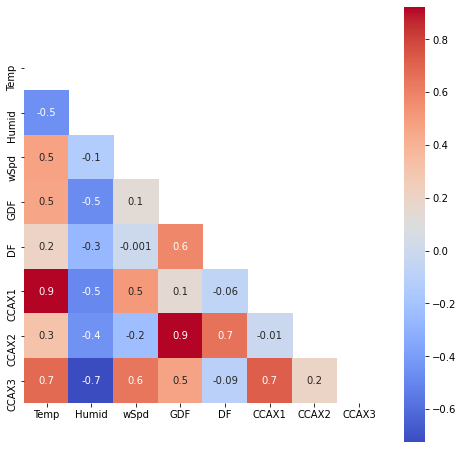

In [28]:
plotHeat(XdfxCCA.corr())

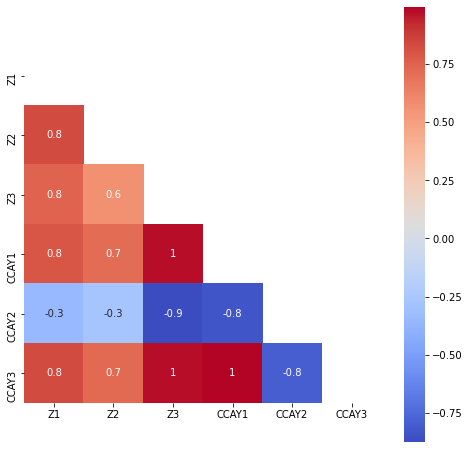

In [29]:
plotHeat(YdfyCCA.corr())

In [30]:
xyCCA = pd.concat([XdfxCCA,YdfyCCA],axis=1, join='inner')
xyCCA.head()

,Temp,Humid,wSpd,GDF,DF,CCAX1,CCAX2,CCAX3,Z1,Z2,Z3,CCAY1,CCAY2,CCAY3
DateTime,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,-1.812106,-2.278623e-14,-7.393965e-15,29197.974683,18026.747720,19252.048193,0.077248,-8.463339e-14,2.253903e-15
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,-1.948356,-2.326628e-14,-8.289270e-15,24657.215190,16078.419453,17042.891567,-0.237970,-8.811811e-14,-2.243242e-14
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,-2.044472,-2.359273e-14,-8.802756e-15,22083.037973,14330.699088,15676.144578,-0.476464,-8.241913e-14,-3.947444e-14
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,-2.026766,-2.349176e-14,-8.264147e-15,20811.139240,13219.452887,14883.855422,-0.627461,-7.435231e-14,-4.968118e-14
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,-1.970271,-2.323589e-14,-7.341968e-15,20475.949367,12921.580547,14317.108433,-0.717313,-6.092919e-14,-5.539463e-14


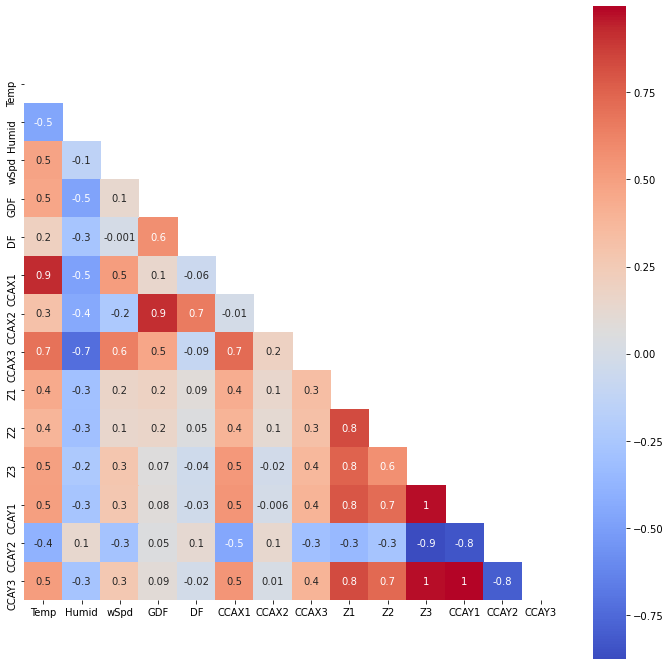

In [31]:
plotHeat(xyCCA.corr(),12)